# Visualize annotations using napari (+ add pathologist annotations)

-------
-------

## 1. Napari visualization

In [1]:
slide_id = "heart_s0"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from spatialdata import SpatialData
from napari_spatialdata import Interactive
import matplotlib.pyplot as plt
import spatialdata as sd
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from sopa._sdata import to_intrinsic

plt.rcParams["figure.figsize"] = (20, 20)

In [ ]:
sdata = SpatialData.read(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr")
sdata

/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


SpatialData object, with associated Zarr store: /Users/felicie-giraud-sauveur/Documents/HE2CellType/sauvegardes/sdata_before_adding_annots/sdata_heart_s0.zarr
├── Images
│     ├── 'he': DataTree[cyx] (3, 10645, 24544), (3, 5323, 12272), (3, 2662, 6136), (3, 1331, 3068), (3, 666, 1534), (3, 333, 767)
│     └── 'morpho': DataTree[cyx] (1, 34050, 14326), (1, 17025, 7163), (1, 8512, 3581), (1, 4256, 1790), (1, 2128, 895)
├── Points
│     └── 'st': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (26366, 1) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (26366, 1) (2D shapes)
└── Tables
      ├── 'table_cells': AnnData (26366, 377)
      └── 'table_nuclei': AnnData (26366, 541)
with coordinate systems:
    ▸ '_st_intrinsic', with elements:
        st (Points)
    ▸ 'global', with elements:
        he (Images), morpho (Images), st (Points), cell_boundaries (Shapes), nucleus_boundaries (Shapes)

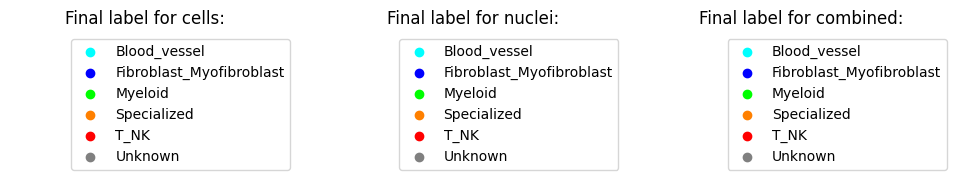

In [4]:
# See legend for final labels in Napari

fig, axs = plt.subplots(1, 3, figsize=(10, 2))

# For table_cells
sorted_cat_cells = sorted(list(sdata.tables["table_cells"].obs["final_label"].unique()))
for category in sorted_cat_cells:
    axs[0].scatter([], [], color=sdata['table_cells'].uns["final_label_colors"][category], label=category)
axs[0].legend(bbox_to_anchor=(0.2, 1), loc='upper left')
axs[0].set_title("Final label for cells:")
axs[0].axis('off')

# For table_nuclei
sorted_cat_nuclei = sorted(list(sdata.tables["table_nuclei"].obs["final_label"].unique()))
for category in sorted_cat_nuclei:
    axs[1].scatter([], [], color=sdata['table_nuclei'].uns["final_label_colors"][category], label=category)
axs[1].legend(bbox_to_anchor=(0.2, 1), loc='upper left')
axs[1].set_title("Final label for nuclei:")
axs[1].axis('off')

# For table_combined
sorted_cat_combined = sorted(list(sdata.tables["table_combined"].obs["final_label_combined"].unique()))
for category in sorted_cat_combined:
    axs[2].scatter([], [], color=sdata['table_combined'].uns["final_label_combined_colors"][category], label=category)
axs[2].legend(bbox_to_anchor=(0.2, 1), loc='upper left')
axs[2].set_title("Final label for combined:")
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Visualize using Napari
Interactive(sdata)

2024-11-04 16:14:34.012 python[29838:291324] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-04 16:14:34.012 python[29838:291324] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2024-11-04 16:15:23.719 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-04 16:15:23.720 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-04 16:16:41.428 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-04 16:16:41.440 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-04 16:16:41.464 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.


-------
-------

## 2. Pathologist annotations

In [1]:
slide_id = "breast_s0"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from spatialdata import SpatialData
from napari_spatialdata import Interactive
import matplotlib.pyplot as plt
import spatialdata as sd
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from sopa._sdata import to_intrinsic
from tqdm.notebook import tqdm

plt.rcParams["figure.figsize"] = (20, 20)

### 2.1. Do the pathologist annotations and save into new sdata

In [3]:
sdata = SpatialData.read(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/sauvegardes/sdata_annots_patho/sdata_{slide_id}.zarr")
sdata

SpatialData object, with associated Zarr store: /Users/felicie-giraud-sauveur/Documents/HE2CellType/sauvegardes/sdata_annots_patho/sdata_breast_s0.zarr
├── Images
│     ├── 'he': DataTree[cyx] (3, 53833, 48441), (3, 26916, 24220), (3, 13458, 12110), (3, 6729, 6055), (3, 3364, 3027), (3, 1682, 1513), (3, 841, 756), (3, 420, 378)
│     └── 'morpho': DataTree[cyx] (1, 53833, 48441), (1, 26916, 24220), (1, 13458, 12110), (1, 6729, 6055), (1, 3364, 3027)
├── Points
│     └── 'st': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (576963, 1) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (576963, 1) (2D shapes)
└── Tables
      ├── 'table_cells': AnnData (576963, 380)
      └── 'table_nuclei': AnnData (576963, 541)
with coordinate systems:
    ▸ '_st_intrinsic', with elements:
        st (Points)
    ▸ 'global', with elements:
        he (Images), morpho (Images), st (Points), cell_boundaries (Shapes), nucleus_boun

In [4]:
print("Length before sampling:", len(sdata.shapes['cell_boundaries']))

if len(sdata.shapes['cell_boundaries']) > 70000:
    
    sdata.shapes['cell_boundaries'] = sdata.shapes['cell_boundaries'].sample(n=70000, random_state=42)
    kept_cell_id = sdata.shapes['cell_boundaries'].index
    
    sdata.shapes['nucleus_boundaries'] = sdata.shapes['nucleus_boundaries'][sdata.shapes['nucleus_boundaries'].index.isin(kept_cell_id)]

    print("Length after sampling:", len(sdata.shapes['cell_boundaries']))

Length before sampling: 576963


/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `cell_boundaries` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/felicie-giraud-sauveur/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `nucleus_boundaries` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


Length after sampling: 70000


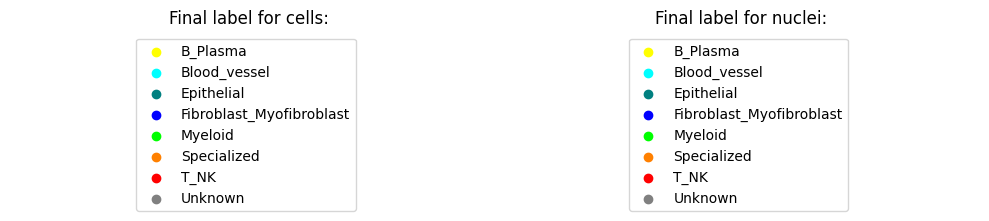

In [5]:
# See legend for final labels in Napari

fig, axs = plt.subplots(1, 2, figsize=(10, 2))

# For table_cells
sorted_cat_cells = sorted(list(sdata.tables["table_cells"].obs["final_label"].unique()))
for category in sorted_cat_cells:
    axs[0].scatter([], [], color=sdata['table_cells'].uns["final_label_colors"][category], label=category)
axs[0].legend(bbox_to_anchor=(0.25, 1), loc='upper left')
axs[0].set_title("Final label for cells:")
axs[0].axis('off')

# For table_nuclei
sorted_cat_nuclei = sorted(list(sdata.tables["table_nuclei"].obs["final_label"].unique()))
for category in sorted_cat_nuclei:
    axs[1].scatter([], [], color=sdata['table_nuclei'].uns["final_label_colors"][category], label=category)
axs[1].legend(bbox_to_anchor=(0.25, 1), loc='upper left')
axs[1].set_title("Final label for nuclei:")
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Do the pathologist annotations in Napari:
# => For each category: 
        # - Add a new points layer and name it with the name of the category (e.g. ‘T_NK’) --> NB: use enter to rename the layer
        # - Then put a point on each core belonging to this category --> NB: use shift-E to save the layer (only in memory, saving on disk have to be then done with .write)).
Interactive(sdata)

2024-11-08 12:53:11.586 python[71438:1845228] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-08 12:53:11.586 python[71438:1845228] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2024-11-08 12:53:17.185 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-08 12:53:17.186 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-08 12:53:59.709 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-08 12:53:59.754 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.
2024-11-08 12:53:59.961 | INFO     | napari_spatialdata._view:_on_layer_update:355 - Updating layer.


In [ ]:
sdata

In [ ]:
# Save on disk
list_layers = ["T_NK", "B_Plasma", "Myeloid", "Bood_vessel", "Fibroblast_Myofibroblast", "Epithelial", "Specialized", "Melanocyte", "Stem_like", "Glioblastoma", "Unknown"]
for layer_name in list_layers:
    if layer_name in list(sdata.points.keys()):
        print(f"Saving layer {layer_name}")
        sdata.write_element(layer_name)
    else:
        print(f"Layer {layer_name} not found in sdata")

### 2.2. Add the pathologist annotations into the final sdata

In [ ]:
sdata = SpatialData.read(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/sauvegardes/sdata_annots_patho/sdata_{slide_id}.zarr")
sdata

In [6]:
def get_patho_annots(sdata_patho, list_layers):

    sdata_patho.shapes["cell_boundaries"]['cell_id'] = sdata_patho.shapes["cell_boundaries"].index
    result_dict = {cell_id: "NoAnnot" for cell_id in sdata_patho.shapes["cell_boundaries"]['cell_id']}

    for layer_name in list_layers:
        print(f"Processing layer {layer_name}:")

        gdf_boundaries = to_intrinsic(sdata_patho, sdata_patho.shapes["cell_boundaries"], sdata_patho.points[layer_name])

        df_annots = sdata_patho.points[layer_name].copy().compute() # Dask to pandas dataframe
        gdf_annots = gpd.GeoDataFrame(df_annots, geometry=gpd.points_from_xy(df_annots.x, df_annots.y), crs="EPSG:4326") # pandas to geopandas dataframe
        
        boundaries_idx, annots_idx = gdf_annots.geometry.sindex.query(gdf_boundaries.geometry, predicate='intersects')

        for cell_id in tqdm(gdf_boundaries.iloc[boundaries_idx]['cell_id'].values, total=len(gdf_boundaries.iloc[boundaries_idx]['cell_id'].values)):
            if result_dict[cell_id] == "NoAnnot":
                result_dict[cell_id] = layer_name
            else:
                print(f"¡¡¡ Warning: cell {cell_id} has multiple annotations, keeping '{result_dict[cell_id]}' and not '{layer_name}' !!!")
    
    return result_dict

In [ ]:
list(sdata.points.keys())

In [ ]:
# ["T_NK", "B_Plasma", "Myeloid", "Blood_vessel", "Fibroblast_Myofibroblast", "Epithelial", "Specialized", "Melanocyte", "Stem_like", "Glioblastoma", "Unknown"]
cellid2patho = get_patho_annots(sdata,
                                [layer for layer in list(sdata.points.keys()) if layer != "st"])

In [8]:
sdata.tables['table_nuclei'].obs['patho_label'] = sdata.tables['table_nuclei'].obs['cell_id'].map(cellid2patho).fillna('Unknown')
sdata.tables['table_cells'].obs['patho_label'] = sdata.tables['table_cells'].obs['cell_id'].map(cellid2patho).fillna('Unknown')

In [ ]:
sdata.tables['table_nuclei'].obs

In [ ]:
sdata.tables['table_cells'].obs

In [ ]:
sdata.tables['table_cells'].obs['patho_label'].value_counts()

In [ ]:
# Save on disk

sdata.delete_element_from_disk("table_nuclei")
sdata.write_element("table_nuclei")

sdata.delete_element_from_disk("table_cells")
sdata.write_element("table_cells")